In [2]:
#!git clone --depth=1 https://github.com/geadalfa/twint.git

In [3]:
#cd twint

In [ ]:
# !pip install . -r requirements.txt

# Import Library

In [1]:
#Crawling
import twint  # import library twint
import nest_asyncio # pip install nest_asyncio 
import json
import time
nest_asyncio.apply() # prevent event loop to be nested
import requests

# Preprocessing
import pandas as pd
pd.set_option('max_colwidth', 5000)
import numpy as np
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

# Visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Untuk menampilkan kata-kata yang sering muncul melalui gambar
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
twi = twint.Config()
#twi.Search = 'Depok OR kesehatan OR rs OR rumah sakit'
#twi.Search = 'Depok OR Kesehatan OR rs'#, 'rumah sakit'#, 'rumah sakit'
#twi.Search = 'Depok', 'puskesmas OR pskms'#, 'rumah sakit'
twi.Search = 'Depok', 'covid OR korona OR corona'
#twi.Search = 'Depok OR dpk', 'sanitasi OR kebersihan OR lingkungan'
twi.Lang = 'in'
twi.Until = '2021-03-30'
twi.Since = '2020-1-1'
#twi.Geo = "-6.406954, 106.794451,100km"51,100km"
twi.Limit = 10000
Pandas = True
twi.Custom["tweet"] = ["id", "date", "username", "tweet"]
#twi.Output = "kesehatan_fix.csv"
twi.Store_csv = True
twint.run.Search(twi)

1376679586717560832 2021-03-30 06:36:05 +0700 <agfiansyah> @fathiafifmhsn Negara wkwkwLAND emang suka bikin acara ga jelas buang² anggaran  3 orang kena korona di depok city  pas sembuh dirayain dipikir korona langsung hilang kali🤣🤣
1376666996616568833 2021-03-30 05:46:03 +0700 <kompascom> Pemerintah Kota Depok mencatat ada 56 kasus baru Covid-19, 218 pasien pulih, dan sembilan warga meninggal akibat Covid-19 dalam sehari.  https://t.co/XKWJyTVu80
1376632223621734400 2021-03-30 03:27:53 +0700 <muhanangfaizin> prokas prokes yo mung gimmick, acara neng kelurahan condong catur kemruyuk yo do nyantai wae petugas2 e.  tracking corona ra jelas, seko rs dikon swab jare gratis, ketuk Puskesmas Depok 2 mung kon rapid ngko kon NUNGGU UNDANGAN SWAB sik seko desember sampai tweet ini dibuat....
1376534175956656129 2021-03-29 20:58:16 +0700 <mediaserunicoid> Wakil Wali Kota Depok, Imam Budi Hartono berharap Jawa Barat Culture and Tourism Festival (JaFest) 2021 dapat membantu memulihkan ekonomi di m

In [2]:
df = pd.read_csv('kesehatan_fix.csv')

In [3]:
df.tail()

id        date        username  \
9997   1268505351759867904  2020-06-04  mediaindonesia   
9998   1268500274534068224  2020-06-04      depokinfo_   
9999   1268491818389233664  2020-06-04    bebekg0rengg   
10000  1268483155087908866  2020-06-04        ahi_yuen   
10001  1268472634758451201  2020-06-04        pawtawin   

                                                                                                                                                                                                                                                                                                                     tweet  
9997                                                                                                                                                                                          Bahkan Kota Depok masuk level 3 penyebaran covid-19 di Jawa atau masih dalam kategori cukup berat.   https://t.co/FhWWfAD28R  
9998                                                                                                                                                                                                                                    #News: Ini Alasan FPKS Tolak Pansus Covid-19  https://t.co/JgIu1xcjC4 | Depok News  
9999                                                                                                                                                                                                                                                               hy ada yg dom depok ga beres Corona meet up yuyuyuyu😁✊🏿  
10000  PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id  https://t.co/TNF4IQA4Q9  
10001                                                                                                                                                                               @brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻

# Preprocessingg

In [4]:
# Merubah menjadi huruf kecil
df['cleaned_tweets'] = df['tweet'].apply(lambda x: x.lower())
df.tail()

id        date        username  \
9997   1268505351759867904  2020-06-04  mediaindonesia   
9998   1268500274534068224  2020-06-04      depokinfo_   
9999   1268491818389233664  2020-06-04    bebekg0rengg   
10000  1268483155087908866  2020-06-04        ahi_yuen   
10001  1268472634758451201  2020-06-04        pawtawin   

                                                                                                                                                                                                                                                                                                                     tweet  \
9997                                                                                                                                                                                          Bahkan Kota Depok masuk level 3 penyebaran covid-19 di Jawa atau masih dalam kategori cukup berat.   https://t.co/FhWWfAD28R   
9998                                                                                                                                                                                                                                    #News: Ini Alasan FPKS Tolak Pansus Covid-19  https://t.co/JgIu1xcjC4 | Depok News   
9999                                                                                                                                                                                                                                                               hy ada yg dom depok ga beres Corona meet up yuyuyuyu😁✊🏿   
10000  PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id  https://t.co/TNF4IQA4Q9   
10001                                                                                                                                                                               @brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻   

                                                                                                                                                                                                                                                                                                            cleaned_tweets  
9997                                                                                                                                                                                          bahkan kota depok masuk level 3 penyebaran covid-19 di jawa atau masih dalam kategori cukup berat.   https://t.co/fhwwfad28r  
9998                                                                                                                                                                                                                                    #news: ini alasan fpks tolak pansus covid-19  https://t.co/jgiu1xcjc4 | depok news  
9999                                                                                                                                                                                                                                                               hy ada yg dom depok ga beres corona meet up yuyuyuyu😁✊🏿  
10000  pkpi halal bi halal bersama rakyat!! pembukaan dapur umum pkpi hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di depok yg terkena dampak covid 19 semoga bermanfaat &amp; berkah @dhendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id  https://t.co/tnf4iqa4q9  
10001                                                                                                                                                                               @

In [5]:
# Implementasi Regular Expression untuk menghapus simbol dan emoji
def normalisasi(text):
    text = text.encode('ascii', 'replace').decode('ascii') # remove non ASCII (emoticon, chinese word, .etc)
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#\w+", " ", text)
    text = re.sub(r'\W', " ", text)
    text = re.sub(r"\d+", "", text)    
    text = re.sub(r'_', ' ',text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"^\s+", '', text)
    #text = text.lstrip()
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: normalisasi(x))
df.tail(2)

id        date  username  \
10000  1268483155087908866  2020-06-04  ahi_yuen   
10001  1268472634758451201  2020-06-04  pawtawin   

                                                                                                                                                                                                                                                                                                                     tweet  \
10000  PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id  https://t.co/TNF4IQA4Q9   
10001                                                                                                                                                                               @brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻   

                                                                                                                                                                                                             cleaned_tweets  
10000  pkpi halal bi halal bersama rakyat pembukaan dapur umum pkpi hari ke mendistribusikan box makanan siap saji untuk meringankan masyarakat di kecamatan di depok yg terkena dampak covid semoga bermanfaat amp berkah   
10001                                                                                               ak ke ui open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok bikin agak panik

In [6]:
# Merubah menjadi kata dasar
dict = {row[0] : row[1] for _, row in pd.read_csv("kbba.txt", delimiter = "\t").iterrows()}

def kbbi(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: kbbi(x))
df.tail(2)

id        date  username  \
10000  1268483155087908866  2020-06-04  ahi_yuen   
10001  1268472634758451201  2020-06-04  pawtawin   

                                                                                                                                                                                                                                                                                                                     tweet  \
10000  PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id  https://t.co/TNF4IQA4Q9   
10001                                                                                                                                                                               @brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻   

                                                                                                                                                                                                              cleaned_tweets  
10000  pkpi halal bi halal bersama rakyat pembukaan dapur umum pkpi hari ke mendistribusikan box makanan siap saji untuk meringankan masyarakat di kecamatan di depok yang terkena dampak covid semoga bermanfaat amp berkah  
10001                                                                                              saya ke ui open days lanjut ke margocity depok terus malemnya di infoin kasus covid pertama ada di depok bikin agak panik

In [7]:
# Menghapus stopwords
def remove_stop_words(text):
    text = text.split()
    listStopword =  set(stopwords.words('indonesian'))
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: remove_stop_words(x))
df.tail(2)

id        date  username  \
10000  1268483155087908866  2020-06-04  ahi_yuen   
10001  1268472634758451201  2020-06-04  pawtawin   

                                                                                                                                                                                                                                                                                                                     tweet  \
10000  PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id  https://t.co/TNF4IQA4Q9   
10001                                                                                                                                                                               @brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻   

                                                                                                                                                                   cleaned_tweets  
10000  pkpi halal bi halal rakyat pembukaan dapur pkpi mendistribusikan box makanan saji meringankan masyarakat kecamatan depok terkena dampak covid semoga bermanfaat amp berkah  
10001                                                                                                        ui open days margocity depok malemnya infoin covid depok bikin panik

In [8]:
# Menghapus baris yang mengandung noise
def noise(text): 
    text = text.split()
    listStopword =  ['amp', 'tong', 'fry', 'vcs', 'bahh', 'a', 'wkwkwk', 'c', 'yeey', 'oi', 'pret', 'iya', 'nya', 'sih', 'mbok', 'ku', 'loh', 'lho', 'ah', 'nihh', 'mares', 'openbo', 'ya', 'hah', 'joss', 'deh''rmp', 'v', 'via', 'lha', 'mah', 'xixi']
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: noise(x))

In [9]:
df['cleaned_tweets'] = df['cleaned_tweets'].astype(str)

In [10]:
df.drop(['id', 'date', 'username'], axis=1, inplace=True)

In [11]:
df

tweet  \
0                                                                                                                                            @fathiafifmhsn Negara wkwkwLAND emang suka bikin acara ga jelas buang² anggaran  3 orang kena korona di depok city  pas sembuh dirayain dipikir korona langsung hilang kali🤣🤣   
1                                                                                                                                                         Pemerintah Kota Depok mencatat ada 56 kasus baru Covid-19, 218 pasien pulih, dan sembilan warga meninggal akibat Covid-19 dalam sehari.  https://t.co/XKWJyTVu80   
2                                   prokas prokes yo mung gimmick, acara neng kelurahan condong catur kemruyuk yo do nyantai wae petugas2 e.  tracking corona ra jelas, seko rs dikon swab jare gratis, ketuk Puskesmas Depok 2 mung kon rapid ngko kon NUNGGU UNDANGAN SWAB sik seko desember sampai tweet ini dibuat....   
3                                                        Wakil Wali Kota Depok, Imam Budi Hartono berharap Jawa Barat Culture and Tourism Festival (JaFest) 2021 dapat membantu memulihkan ekonomi di masa pandemi Covid-19. Terutama, pada sektor industri pariwisata.   https://t.co/UlC8uMgZNS  https://t.co/eHHNLaCYos   
4                                                                                                                                                                                                                                                                    @hanakubil2 corona ilang gua samperin lu ke depok bil   
...                                                                                                                                                                                                                                                                                                                    ...   
9997                                                                                                                                                                                          Bahkan Kota Depok masuk level 3 penyebaran covid-19 di Jawa atau masih dalam kategori cukup berat.   https://t.co/FhWWfAD28R   
9998                                                                                                                                                                                                                                    #News: Ini Alasan FPKS Tolak Pansus Covid-19  https://t.co/JgIu1xcjC4 | Depok News   
9999                                                                                                                                                                                                                                                               hy ada yg dom depok ga beres Corona meet up yuyuyuyu😁✊🏿   
10000  PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id  https://t.co/TNF4IQA4Q9   
10001                                                                                                                                                                               @brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻   

                                                                                                                                                                                                                                       cleaned_tweets  
0                                                                                                               negara wkwkwland suka bikin acara buang anggaran orang kena korona depok city pas sembuh dirayain dipikir korona langsung hilang kal

In [12]:
import math 

def split(word):
    return [char for char in word]

def wordCluster(custom ,original):
    data = split(original)
    split_input = split(custom)
    index = 0
    result = ''
    for x in split_input:
        if index > len(data)-1:
            index = len(data)-1
        if (x == data[index]):
            result += x
            index += 1
        if index == len(original):
            break
    return result

wordCluster('semenjak jatuh', 'sejak')

'sejak'

In [13]:
'''import spacy
nlp = spacy.blank('id')
from spacy.lang.id import Indonesian
nlp_id = Indonesian()

df["stemmed_tweets"] = df["cleaned_tweets"].apply(lambda x: " ".join([y.lemma_ for y in nlp_id(x)]))'''
#df["stemmed_tweets"] = df["cleaned_tweets"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))


# def Stemming(tweet):
#     token = nltk.word_tokenize(tweet)
#     stem_kalimat = []
#     for k in token:
#         factory = StemmerFactory()
#         stemmer = factory.create_stemmer()
#         stem_kata = stemmer.stem(k.encode('ascii','ignore'))
#         stem_kalimat.append(stem_kata)

#     stem_kalimat_str = ' '.join(stem_kalimat)
#     return stem_kalimat_str

# menghilangkan semua imbuhan kata dalam kalimat
'''def steamming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    split = text.split()
    hasil = [stemmer.stem(token) for token in split]
    hasil = " ".join(hasil)
    return hasil

df['stemmed_tweets'] = df['cleaned_tweets'].apply(lambda x: steamming(x))'''

#df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: Stemming(x))


'def steamming(text):\n    factory = StemmerFactory()\n    stemmer = factory.create_stemmer()\n    split = text.split()\n    hasil = [stemmer.stem(token) for token in split]\n    hasil = " ".join(hasil)\n    return hasil\n\ndf[\'stemmed_tweets\'] = df[\'cleaned_tweets\'].apply(lambda x: steamming(x))'

In [14]:
df1 = df.copy()
df1.drop(['tweet'], axis=1, inplace=True)
df1.drop_duplicates(keep=False,inplace=True)
df1.reset_index(drop=True, inplace=True)

In [15]:
len(df1)
df1.tail(2)

cleaned_tweets
7755  pkpi halal bi halal rakyat pembukaan dapur pkpi mendistribusikan box makanan saji meringankan masyarakat kecamatan depok terkena dampak covid semoga bermanfaat berkah
7756                                                                                                    ui open days margocity depok malemnya infoin covid depok bikin panik

In [16]:
#df.to_excel("output.xlsx") 

# Visualisasi Kata

In [17]:
import matplotlib.pyplot
import seaborn as sns

comment_words=''

for val in df.cleaned_tweets:  
    # merubah val menjadi string
    val = str(val)
  
    # memisahkan variabel val per kata
    tokens = val.split() 
      
    # Mengonversi variabel val menjadi huruf kecil
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "


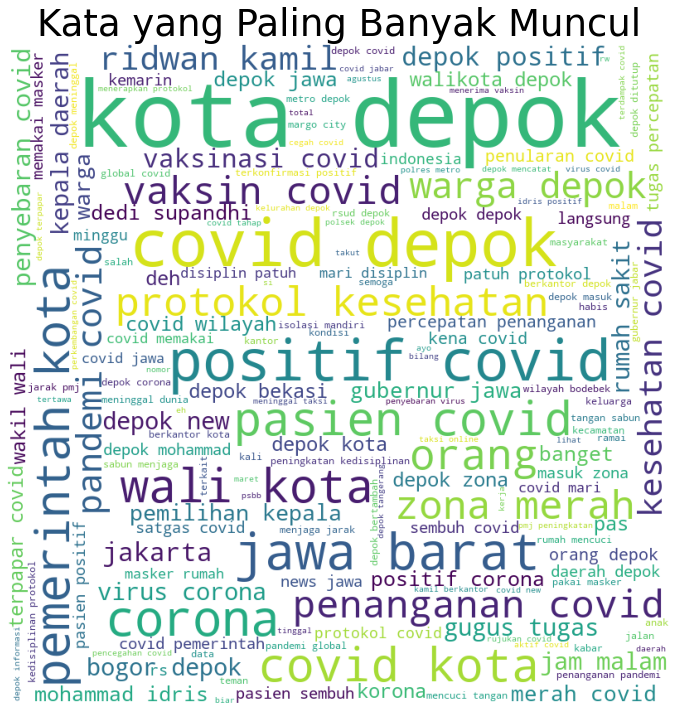

In [18]:
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.title("Kata yang Paling Banyak Muncul", fontsize = 37)
plt.tight_layout(pad = 1) 
  
plt.show() 

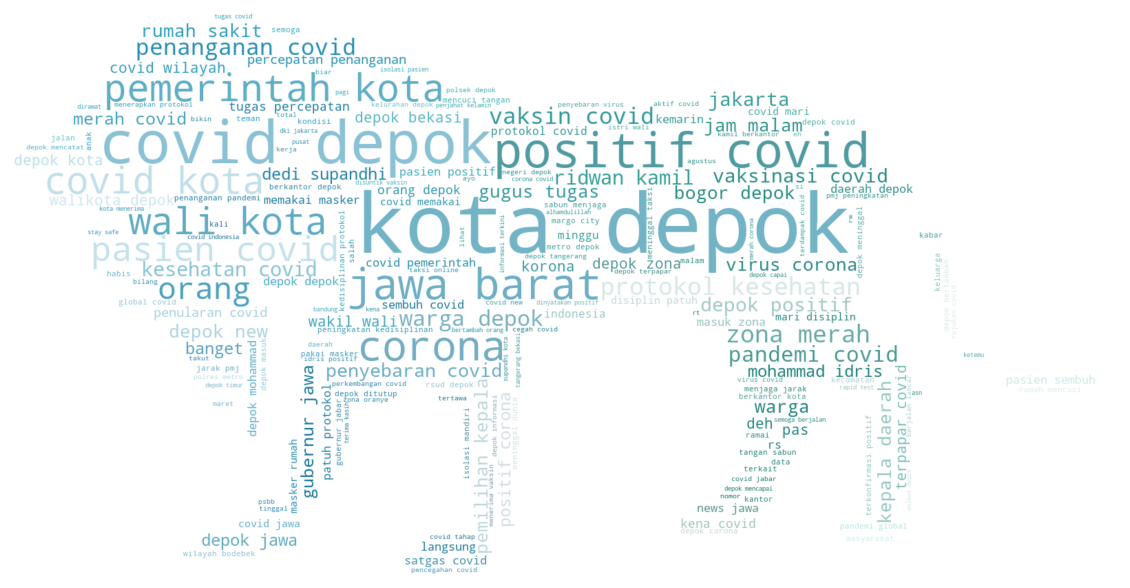

In [19]:
# Mengambil gambar dari website
Mask = np.array(Image.open(requests.get('http://clipart-library.com/images_k/animal-silhouette-painting/animal-silhouette-painting-7.png', stream = True).raw))

# Menggunakan warna dari gambar yang telah diambil
image_colors = ImageColorGenerator(Mask)

# Menggunakan fungsi wordcloud dan memasukkan ke dalam variabel wc 
wc = WordCloud(background_color = 'white', height = 3000, width = 5000, mask = Mask).generate(comment_words)

# Menentukan besarnya gambar
plt.figure(figsize = (20, 30))

# Menampilkan gambar sesuai dengan warna yang telah ada di dalam gambar
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")

plt.axis('off')
plt.show()

In [20]:
with open('sentimentword.txt', 'r') as data:
    for line in data :
        line.rstrip()
    plaintext = data.read()
    
plaintext = plaintext.replace(' ', ',')

with open('kata_sentimen_negatif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext1 = data.read()
    plaintext1 = plaintext1.rstrip()
    
with open('kata_sentimen_positif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext2 = data.read()
    plaintext2 = plaintext2.rstrip()

with open("kata_sentimen.txt", 'w') as f:
    f.write(plaintext + '\n')
    
with open("kata_sentimen_fix.txt", 'w') as f:
    f.write(plaintext + '\n')
    f.write(plaintext1 + '\n')
    f.write(plaintext2 + '\n')

with open("kata_sentimen_fix.txt", 'r') as f:
    sentifix = f.read()
sentifix = sentifix.replace(',', '\t')

with open("sentifix.txt", 'w') as f:
    f.write(sentifix + '\n')

In [21]:
kamus_sentimen = 'sentifix.txt'

def sentiment_dict(kamus_sentimen):
    ''' (file) -> dictionary
This method should take your sentiment file
and create a dictionary in the form {word: value}
'''    
    kamus = open(kamus_sentimen)
    scores = {} # initialize an empty dictionary
    for line in kamus:
        term, score = line.split("\t") # The file is comma-delimited. 
        scores[term] = int(score) # Convert the score to an integer.

    return scores

In [22]:
import codecs

doc = codecs.open('sentifix.txt','rU','UTF-8') #open for reading with "universal" type set

kamus = pd.read_csv(doc, sep='\t', header=None)
kamus

0  1
0             kali -1
1         terbatas -3
2      penyebabnya -4
3          positif -1
4           korona -2
...            ... ..
10230    melarikan  3
10231      vakansi  3
10232      spesial  4
10233       asrama  3
10234     orisinal  3

[10235 rows x 2 columns]

In [23]:
kamus = kamus.set_index(0).T.to_dict('records')
dct = {}
for item in kamus:
    dct.update(item)

dct

C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


{'kali': -1,
 'terbatas': 3,
 'penyebabnya': -4,
 'positif': 4,
 'korona': -2,
 'corona': -2,
 'covid': -2,
 'pandemi': -5,
 'putus tali gantung': -2,
 'gelebah': 2,
 'gobar hati': -2,
 'tersentuh (perasaan)': -1,
 'isak': -5,
 'larat hati': -3,
 'nelangsa': -3,
 'remuk redam': -5,
 'tidak segan': 2,
 'gemar': 5,
 'tak segan': 2,
 'sesal': 1,
 'pengen': 3,
 'penghayatan': 3,
 'absorpsi': 3,
 'linu': 4,
 'salah benang': -1,
 'sakit': -5,
 'lara': -5,
 'zuhud': 2,
 'mencederai': -4,
 'mengingkari': -4,
 'maaf': 2,
 'mengkhianat': -4,
 'mencelakai': -5,
 'mulu': 2,
 'ngga': -2,
 'borong': 2,
 'lever': -2,
 'kasian': -3,
 'gamau': -4,
 'doang': 1,
 'pulas': 4,
 'abis': 1,
 'coba': 2,
 'kangen': 3,
 'kalau': -1,
 'maunya': -1,
 'seandainya': -1,
 'marilah': 1,
 'bener': 3,
 'yaudah': 1,
 'nggak': 1,
 'gatau': -1,
 'apaan': -4,
 'ngakak': -2,
 'atuh': -1,
 'sekali': -1,
 'menarik hati': 3,
 'cedayam': 2,
 'kece': 5,
 'termakan': 1,
 'belom': 1,
 'malem': -1,
 'mencekau': -2,
 'menduga': 3,
 

In [24]:
#type(dct['covid'])

int

In [25]:
# df_list = df1.values.tolist()
# df_list

In [26]:
# def tweet_dict(twitterData):
#     ''' (file) -> list of dictionaries
# This method should take your output.txt
# file and create a list of dictionaries.
# '''
#     twitter_list_dict = []
#     #storing the user given sentance to the dictionary for the classification
#     twitter_list_dict.extend([twitterData])
#     #twitter_list_dict = ["it is good not bad","good movie i love it", "hate this, really hate this movie"] you can use this if you want to work with direct list with data
#     return twitter_list_dict

In [27]:
#tweets

In [28]:
df_list = df1['cleaned_tweets'].values.tolist()
df_list

['negara wkwkwland suka bikin acara buang anggaran orang kena korona depok city pas sembuh dirayain dipikir korona langsung hilang kali',
 'pemerintah kota depok mencatat covid pasien pulih sembilan warga meninggal akibat covid sehari',
 'prokas prokes mung gimmick acara neng kelurahan condong catur kemruyuk do nyantai wae petugas e tracking corona ra seko rs dikon swab jare gratis ketuk puskesmas depok mung kon rapid ngko kon menunggu undangan swab sik seko desember tweet',
 'wakil wali kota depok imam budi hartono berharap jawa barat culture and tourism festival jafest membantu memulihkan ekonomi pandemi covid sektor industri pariwisata',
 'corona hilang samperin depok bil',
 'covid stok darah pmi kota depok ideal',
 'badan keuangan daerah kecamatan kota depok menerapkan protokol kesehtatan covid kesempatan badan keuangan daerah kecamatan kota depok mengapresiasi kinerja kejaksaan negeri depok beserta jajaran pelayanan',
 'vial vaksin covid tahap depok',
 'cgv bogor dimohon buka main

In [29]:
for line in df_list:
    Type = line.split(",")
    print(Type)
    

['negara wkwkwland suka bikin acara buang anggaran orang kena korona depok city pas sembuh dirayain dipikir korona langsung hilang kali']
['pemerintah kota depok mencatat covid pasien pulih sembilan warga meninggal akibat covid sehari']
['prokas prokes mung gimmick acara neng kelurahan condong catur kemruyuk do nyantai wae petugas e tracking corona ra seko rs dikon swab jare gratis ketuk puskesmas depok mung kon rapid ngko kon menunggu undangan swab sik seko desember tweet']
['wakil wali kota depok imam budi hartono berharap jawa barat culture and tourism festival jafest membantu memulihkan ekonomi pandemi covid sektor industri pariwisata']
['corona hilang samperin depok bil']
['covid stok darah pmi kota depok ideal']
['badan keuangan daerah kecamatan kota depok menerapkan protokol kesehtatan covid kesempatan badan keuangan daerah kecamatan kota depok mengapresiasi kinerja kejaksaan negeri depok beserta jajaran pelayanan']
['vial vaksin covid tahap depok']
['cgv bogor dimohon buka main

In [28]:
'''#var = input("Enter something: ")

def tweet_dict(twitterData):
    ''' #(file) -> list of dictionaries
#This method should take your output.txt
#file and create a list of dictionaries.
'''
    twitter_list_dict = []
    #storing the user given sentance to the dictionary for the classification
    twitter_list_dict.extend([var])
    #twitter_list_dict = ["it is good not bad","good movie i love it", "hate this, really hate this movie"] you can use this if you want to work with direct list with data
    return twitter_list_dict'''

df3 = pd.DataFrame([['alat airtime recharge'],
                  ['alat nip transfer'],
                  ['alat transfer'] ,
                  ['wema ussd transfer']],columns=['description'])

labels = { #transfer
          "tnf":"transfers", "trsf":"transfers","trtr":"transfers", "trans":"transfers",
 
           #bills
           "otp":"bills","fee":"bills","charge":"bills",

           #airtime
          "recharge":"airtime","airtime":"airtime","top-up":"airtime",
      }

labs = []
data = df3['description']
# Labelling the transaction according to the dictionary defined
for i in data:
    check_list = i.split()
    f = 0
    #check if j is in data[i]
    loop = True
    while loop==True:
        for j in list(labels.keys()):
            if loop==False:
                break
            for x in check_list:
                if loop==False:
                    break
                if x.startswith(j):
                    labs.append(labels[j])
                    f = 1
                    loop=False
    if f == 0:
        labs.append("others")

df3["Label"] = pd.DataFrame(labs)
df3

description      Label
0  alat airtime recharge    airtime
1      alat nip transfer  transfers
2          alat transfer  transfers
3     wema ussd transfer  transfers

In [109]:
# labs = []
# data = df1['cleaned_tweets']
# # Labelling the transaction according to the dictionary defined
# for i in data:
#     check_list = i.split()
#     sent_score = 0
#     # check if j is in data[i]
#     loop = True
#     while loop==True:
#         for j in list(dct.keys()):
#             if loop==False:
#                 break
#             for x in check_list:
#                 if loop==False:
#                     break
#                 if x in dct.keys():
#                     sent_score = sent_score + int(dct[word])
#                     print(sent_score)
#                     loop=False

#                 else:
#                     sent_score = sent_score
#                     #print(sent_score)
#                     loop=False
# #                 if x.startswith(j):
# #                     labs.append(dct[j])
# #                     f = 1
# #                     loop=False
# #     if f == 0:
# #         labs.append("others")

In [30]:
data = df1['cleaned_tweets']
skor = []
#for index in range(len(df1)):
    #tweet_word = tweets[index].split(',')
for line in data:
    tweet_word = line.split()
    #sent_score is a variable which will take care of word strength / word weightage
    sum_score = 0
    sent_score = 0
    l = len(tweet_word)
    #print(l)
    
    for word in tweet_word:
        word = word.rstrip('?:!.,;"!@')
        word = word.replace("\n", "")

        if word in dct.keys():
            sum_score += int(dct[word])\
    
    skor.append(sum_score)
#     skor.append([line, sum_score])
#             break

#         else:
#             sent_score = sent_score
#             sum_score = sum_score + sent_score
#             skor.append([line, sum_score])
#             #print(sent_score)
#             break

print(len(skor))
# print(tweet_word)
#print(l)

7757


In [31]:
print(skor[10])

-3


In [274]:
# data = df1['cleaned_tweets']
# skor = []
# #for index in range(len(df1)):
#     #tweet_word = tweets[index].split(',')
# for line in data:
#     tweet_word = line.split()
#     #sent_score is a variable which will take care of word strength / word weightage 
#     sent_score = 0
#     for word in tweet_word:
#         word = word.rstrip('?:!.,;"!@')
#         word = word.replace("\n", "")

#         if word in dct.keys():
#             sent_score = sent_score + int(dct[word])
#             #break
#             skor.append(sent_score)
#             #print(sent_score)
#             break

#         else:
#             sent_score = sent_score
#             #break
#             skor.append(sent_score)
#             #print(sent_score)
#             break
#print(len(sent_score))

#     if int(sent_score) > 0:
#         print(tweets[index])
#         if (int(sent_score) > 0.7):
#             print(sent_score) 
#             print('Highly Positive Sentiment')
#         else:
#             print(sent_score)
#             print('Positive Sentiment')


#     if int(sent_score) < 0:
#         print(tweets[index])
#         if int(sent_score) < -0.7:
#             print(sent_score)
#             print('Highly Negative Sentiment')
#         else:
#             print(sent_score)
#             print('Negative Sentiment')


#     if int(sent_score) == 0:
#         print(tweets[index])
#         print('Neutral Sentiment')
print(len(skor))

7757


In [34]:
#skor
df1['nilai'] = skor
df1.tail(10)

cleaned_tweets  \
7747                                                                                        ramai pemohon sim satpas sim pasar segar depok layanan prima sesuai protokol covid co id   
7748                                                                                 tol depok antasati desari arah jalan raya sawangan dipakai lebaran kemarin dibuka pandemi covid   
7749                                          pemerintah provinsi jawa barat bogor depok bekasi bodebek mengikuti kebijakan pemerintah provinsi dki jakarta terkait penanganan covid   
7750  covid mnc peduli menyalurkan bantuan tim medis garda terdepan menghadapi covid rumah sakit jakarta daerah bogor depok bandung kendal semarang makassar kupang maumere jayapura   
7751                                                                                         aamiin semangatt ngomong-ngomong saudara test ui gatauu deh bekasi depok lumayan corona   
7752                                                                                                                     kota depok masuk level penyebaran covid jawa kategori berat   
7753                                                                                                                               alasan fpks tolak panitia khusus covid depok news   
7754                                                                                                                                      hy dom depok beres corona meet up yuyuyuyu   
7755          pkpi halal bi halal rakyat pembukaan dapur pkpi mendistribusikan box makanan saji meringankan masyarakat kecamatan depok terkena dampak covid semoga bermanfaat berkah   
7756                                                                                                            ui open days margocity depok malemnya infoin covid depok bikin panik   

      nilai  
7747     16  
7748     -5  
7749      5  
7750     -3  
7751      2  
7752     -5  
7753     -2  
7754      1  
7755     16  
7756     -7

In [ ]:
# kamus_dict = kamus.to_dict('dict')
# kamus_dict